## PCA, Redução de atributos e Multicolinearidade

A multicolinearidade ocorre quando as variáveis (features) são altamente correlacionados entre si. Isto afeta a performance dos modelos de regressão e classificação.

O PCA (Principal Component Analysis) se aproveita da multicolinearidade, pois combina as variáveis altamente correlacionadas em um conjunto de variáveis não correlacionadas.

Neste post, vamos construir um modelo de regressão logística para a base breast_cancer. Primeiro, vamos abordar o problema sem aplicar o PCA e, em seguida, comparar o resultado com a aplicação do PCA.

Baseado no post https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b#:~:text=PCA%20in%20action%20to%20remove%20multicollinearity&text=Multicollinearity%20occurs%20when%20features%20(input,of%20regression%20and%20classification%20models.

In [34]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [37]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [39]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
df.shape

(569, 30)

A base possui 30 varáveis e 569 observações. O PCA nos ajudará na multicolinearidade, caso haja. De qualquer forma ao aplicarmos o PCA reduziremos o número de variáveis, isto é, faremos uma redução de dimensionalidade.

### Heatmap

Primeiro, vamos criar um heatmap para visualizar a correlação entre as variáveis da base. 

Como você pode ver, algumas variáveis são altamente correlacionadas com outras, ou seja, temos multicolinearidade.

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

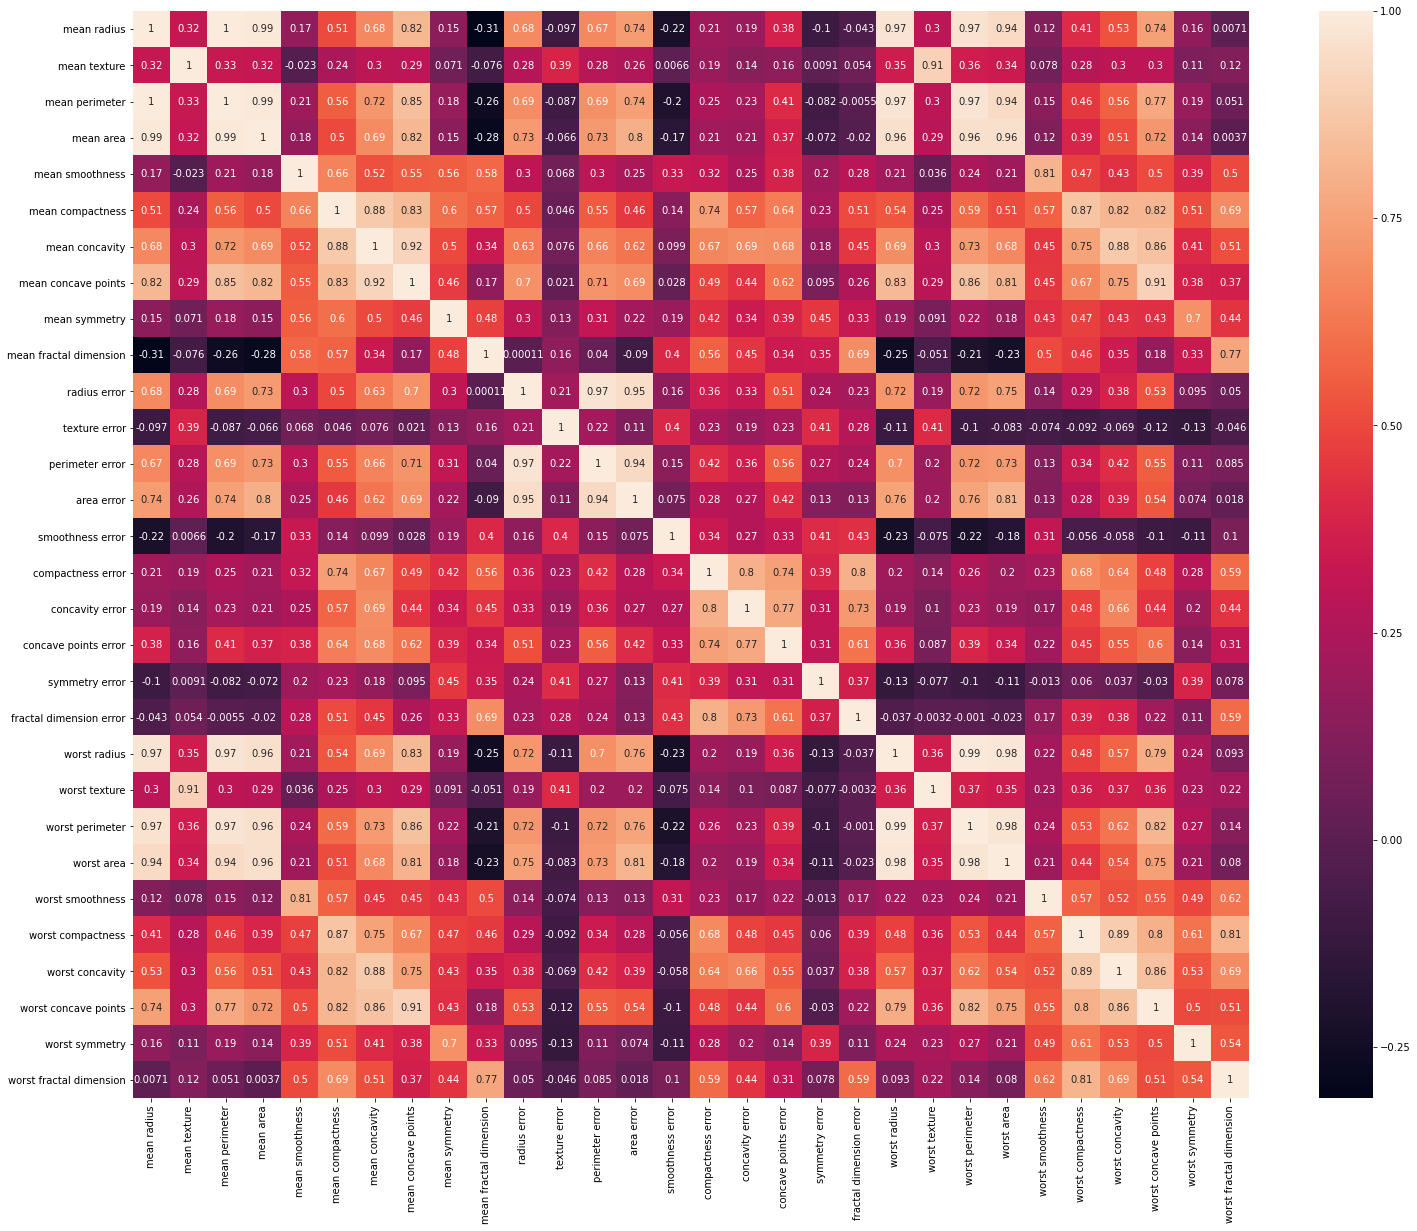

In [7]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, ax=ax)

### Construindo o modelo

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
X = df
y = pd.Series(cancer.target)

<AxesSubplot:>

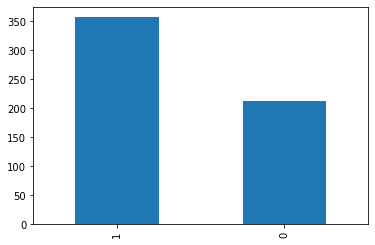

In [10]:
y.value_counts().plot(kind='bar')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

In [12]:
clf = LogisticRegression(max_iter=2500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2500)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
# Avaliação do resultado

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
print("Train accuracy: ", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy: ", np.round(accuracy_score(y_test, clf.predict(X_test)), 2))

Train accuracy:  0.96
Test accuracy:  0.96


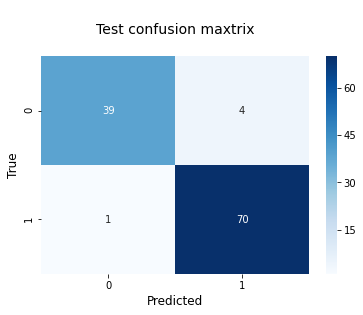

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("\nTest confusion maxtrix\n", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12);

O modelo básico é muito bom. Não temos overfitting. Ele funcionou bem com os dados de teste. Vamos ver se podemos melhorar o desempenho do modelo aplicando o PCA.

### Aplicando o PCA

O PCA é uma técnica para redução de dimensionalidade linear que transformar um conjunto de variáveis correlacionadas (p) em um número menor k (k < p) de variáveis não correlacionadas chamadas de **componentes principais** mantendo o máximo possível da variação da base original. No contexto de Machine Learning, é considerado um algoritmo não supervisionado usado para redução de dimensionalidade. Se uma

Se as variáveis não estiverem na mesma escala, precisamos fazer esta transformação antes de aplicar o PCA aos nossos dados, pois as direções do PCA são altamente sensíveis à escala dos dados.

A parte mais importante do PCA é selecionar o melhor número de componentes para um determinado conjunto de dados. Vamos começar com essa etapa e por isso não vamos definir o número de componentes.

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
# Normalizando a base para que as variáveis estejam na mesma escala

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [44]:
# Aplicando o PCA

pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [45]:
print("Autovalores:")
print(pca.explained_variance_)
print()

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Autovalores:
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]

Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]



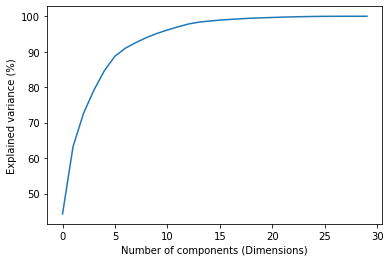

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)");

O primeiro componente sozinho captura cerca de 44% de variabilidade nos dados e o segundo captura cerca de 19% de variabilidade nos dados e assim por diante. Os primeiros 6 componentes juntos capturam cerca de 88,76% de variabilidade nos dados. Vamos manter os primeiros 6 componentes.

In [47]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

In [48]:
# PCA com 6 componentes

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

In [49]:
X_pca.head()

,0,1,2,3,4,5
0,9.192837,1.948583,-1.123167,3.633736,-1.195104,1.411437
1,2.387802,-3.768172,-0.529293,1.118262,0.621773,0.028652
2,5.733896,-1.075174,-0.551747,0.912078,-0.177091,0.541440
3,7.122953,10.275589,-3.232790,0.152546,-2.960879,3.053419
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226498


Observando o heatmap dos componentes não vemos qualquer correlação entre eles. Isso ocorre porque o PCA transformou o conjunto de variáveis correlacionadas em um conjunto de variáveis não correlacionadas.

<AxesSubplot:>

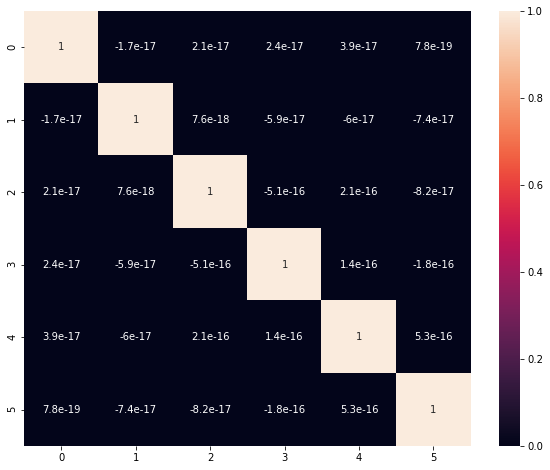

In [50]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_pca.corr(), annot=True, ax=ax)

### PCA + Regressão Logística

In [51]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, shuffle=True, random_state=42)

In [52]:
clf = LogisticRegression(max_iter=2500)
clf.fit(X_train_pca, y_train)

LogisticRegression(max_iter=2500)

In [53]:
y_pred = clf.predict(X_test_pca)

In [54]:
print("Train accuracy: ", np.round(accuracy_score(y_train, clf.predict(X_train_pca)), 2))
print("Test accuracy: ", np.round(accuracy_score(y_test, clf.predict(X_test_pca)), 2))

Train accuracy:  0.98
Test accuracy:  0.98


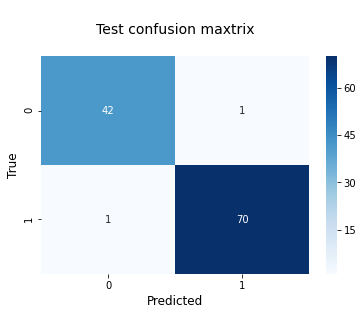

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("\nTest confusion maxtrix\n", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12);

Você pode comparar os dois desempenhos, antes e depois do PCA. A acurácia do teste aumentou em 2% e o número falsos negativos também foi reduzido. 

## Construindo um Pipeline para nosso projeto

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
sc = StandardScaler()
pca = PCA(n_components=6)
log_reg = LogisticRegression(max_iter=2500)

log_reg_model = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('regressor', log_reg)
])

In [58]:
log_reg_model.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LogisticRegression(max_iter=2500))])

---